In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb

from pandas.tools.plotting import radviz
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import andrews_curves

%matplotlib inline

In [185]:
data = pd.read_csv('dermatology.data', header=None,)
data.replace('?',0, inplace=True)
data = data.astype(int)
data[data.columns[-1]] = data[data.columns[-1]] - 1
data.columns = 'c' + data.columns.astype('str')
print(data.shape)
data.iloc[0:10]

(366, 35)


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,1
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,2
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,0
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,2
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,1
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,4
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,2
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,3
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,3


In [195]:
n = 0.8
train = data.iloc[ :int(data.shape[0]*n) ]
test = data.iloc[ int(data.shape[0]*n): ]
print(train.shape)
print(test.shape)

(292, 35)
(74, 35)


In [196]:
train_X = train.ix[:, 0:33].as_matrix()
train_Y = train.ix[:, 34].as_matrix()

test_X = test.ix[:, 0:33].as_matrix()
test_Y = test.ix[:, 34].as_matrix()

xg_train = xgb.DMatrix( train_X, label=train_Y)
xg_test = xgb.DMatrix( test_X, label=test_Y)

In [199]:
param = { 'objective':'multi:softmax',
            'nthread':2,
            'num_class':6,
            'max_depth':5,
            'eta':0.1,
            'silent':0
        }
watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist, verbose_eval=False )
# get prediction
pred = bst.predict( xg_test )
print ('predicting, classification error = %f' % (sum( int(pred[i]) != test_Y[i] for i in range(len(test_Y))) / float(len(test_Y)) ))

predicting, classification error = 0.027027


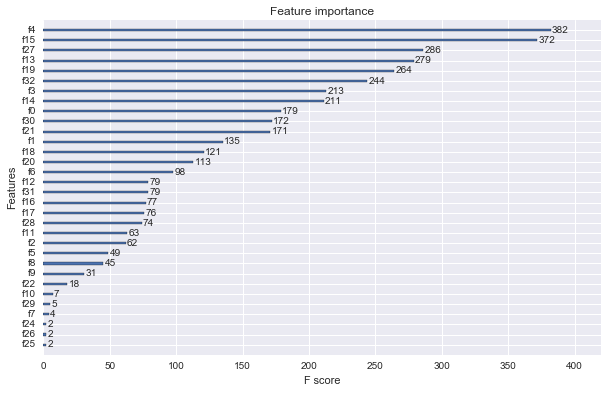

In [162]:
xgb.plot_importance(bst)
plt.gcf().set_size_inches((10,6))
plt.show()

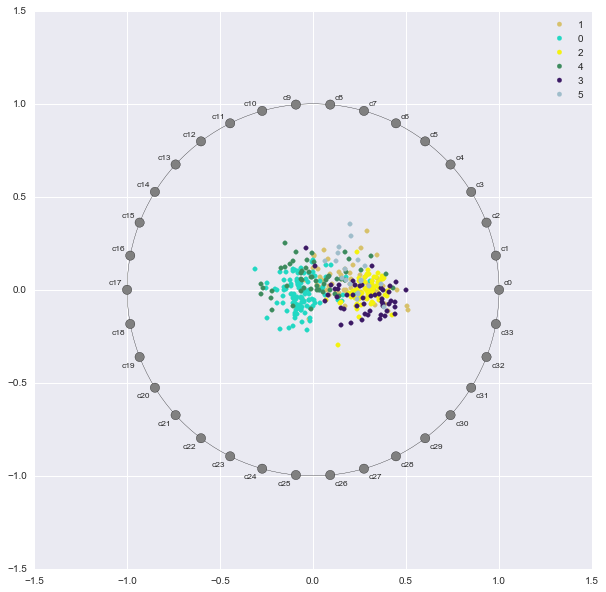

In [169]:
radviz(data, 'c34')
plt.gcf().set_size_inches((10,10))

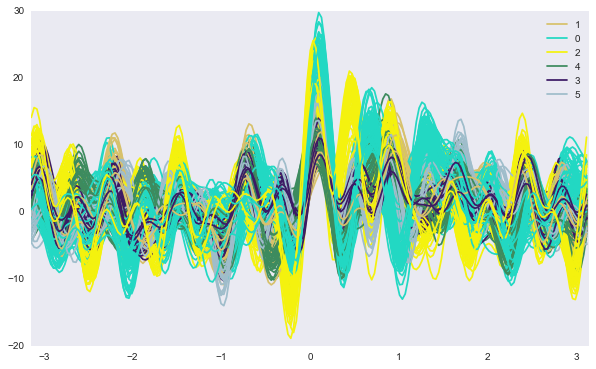

In [210]:
andrews_curves(data, 'c34')
plt.gcf().set_size_inches((10,6))